In [1]:
import numpy as np

In [2]:
import matplotlib
import matplotlib.pyplot as plt

In [3]:
import scipy

In [4]:
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
import pandas as pd

In [6]:
import seaborn as sns

In [7]:
filepath = './data/'

# SVMs

the main ideia of the `Support Vector Machines (SVMs)` algorithm is that by an appropriate coordinate (i.e., feature) transformation, we can project the data onto a higher-dimensional space where they can be `linearly separated` (with some noise)

## binary classification

### linearly separable dataset

* the SVM algorithm for linear separable data
    * consider any possible separation between the two classes, and pick for each one the closest example(s) from the positive and negative class. The `margin of an SVM` is defined as the empty space described by the two parallel lines that touch these closest examples, and the `decision boundary` of the SVM will be the line in the middle of the margin (so that the decision boundary is equidistant from the two classes).
    * the optimal decision boundary is defined as the one that maximizes the width of the margin, achieving maximal separation. The examples from each class that determine the decision boundary are called the `support vectors`; their number depends on the spatial distribution of the training examples in feature space, with a minimum of two.
    * A linear classifier has a `decision/discriminant function` that is linear in the input examples
    
        $f(x) = w^T x + b$,
        where the vector $w$ is known as the weight vector; $b$ is called the bias, and $w^Tx$ is the dot product between the weight vector and any input example x
        
        The decision boundary of this classifier is where the decision function vanishes $f(x) = 0$.
        The hyperplane defined by this equation divides the space into two according to the sign of the discriminant function f(x). We can always redefine the labels so that the positive examples are characterized by $f(x) > 0$, and the negative examples are characterized by $f(x) < 0$.
        
        The decision function for the closest examples from each class ($x_+$ and $x_−$) will be
        $f(x_+) = w^T x_+ + b > 0$ and $f(x_-) = w^T x_- + b < 0$. Calling $a = w^T x_+ + b = - w^T x_- + b$, we get $f(x_+) = a$ and $f(x_-) = -a \overset{/ a}{\iff} f'(x_+) = 1$ and $f'(x_-) = -1$. In this new coordinate system, the decision function for examples outside the margin will be $f(x) > 1$ or $f(x) < −1$. If we use the labels $y^i = 1$ for positive examples and $y^i = -1$ for negative examples, the boundary can be written as a single expression for both cases as $y^i f(x) \ge 1 \iff y^i (w^T x + b) \ge 1$. In this scenario, the `width of the margin` is $d = 2/|x|$ (which is the `loss function`) and the problem can be written as
        
        $
        \begin{align}
        &\text{maximize}_{x, b} \; 2/|x|\\
        &\text{subject to} \; y^i (w^T x + b) \ge 1
        \end{align}
        $
        $
        \iff
        \begin{align}
        &\text{minimize}_{x, b} \; \frac{1}{2}|x|^2\\
        &\text{subject to} \; y^i (w^T x + b) \ge 1
        \end{align}
        $
        
        The solution to this optimization problem is that the weight vector can be expressed as a linear combination of the training examples $w = \sum_{i=1}^n y_i \alpha_i x_i$. The $\alpha_i$ are the Lagrange multipliers obtained from the dual problem. The examples for which $\alpha_i \neq 0$ are the `support vectors`

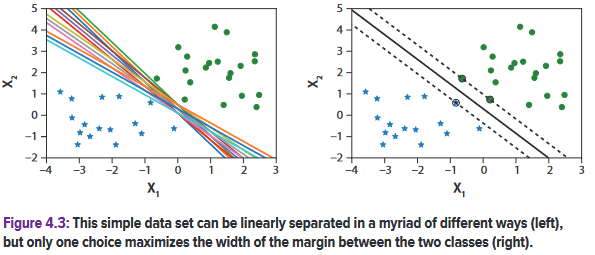

### almost-linearly separable (noisy) dataset

* the SVM algorithm can be generalized to nonseparable data sets by using `"slack variables"`

    here we have to accept that there will be examples that lie within the margin ("on the street") and that there will be examples that are misclassified. We can attribute a penalty to each of these cases by introducing `slack variables` $\xi_i$ that describe the distance between the margin and the examples. Therefore, we can attempt to maximize the width of the margin (or, equivalently, minimize the L2 norm of the weight vector) while we minimize the sum of the penalty terms associated with examples that are within the margin (for which $0 < \xi_i < 1$) or are misclassified (for which $\xi_i > 1$). The margin is in this case a `soft margin`, in contrast with the margin of the exactly separable case, which is a `hard margin`. the problem can be recast as

    $
    \begin{align}
    &\text{minimize}_{x, b} \; \frac{1}{2}|x|^2 + C \sum_i \xi_i\\
    &\text{subject to} \; y^i (w^T x + b) \ge 1
    \end{align}
    $

    The `regularization parameter C` is the penalty attributed to training examples that are either in the margin or misclassified. It represents the trade-off between having a wide margin and having few misclassifications/within-margin examples.

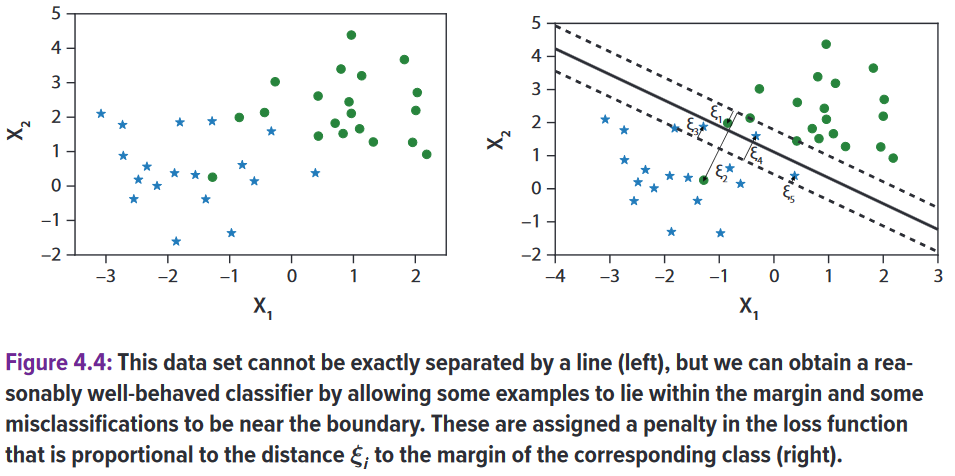

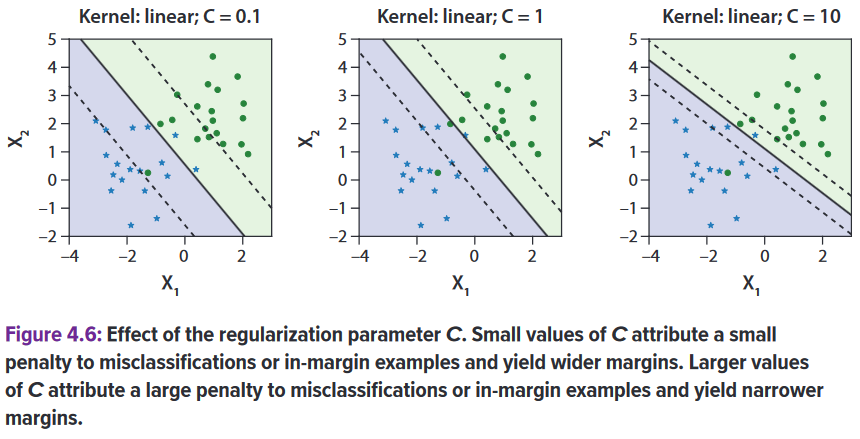

### non-linearly separable dataset

* the SVM algorithm can be generalized to nonlinear boundaries by using `kernels`

    we want to find an appropriate coordinate transformation from the original space with feature vector $x$ to a higher-dimensional space with feature vector $\phi(x)$ (we are doing feature mapping)

    The problem is, explicitly computing $\phi(x)$ and performing operations in the high-dimensional space can be computationally expensive. Instead, we use the `"kernel trick"` (implicit feature napping) that allows us to compute the dot product between two transformed feature vectors $\phi(x)$ and $\phi(z)$ without explicitly performing the transformation. This is achieved using a kernel function $K(x, z)$ that directly computes the dot product in the transformed space $K(x, z) = \phi(x)^T \phi(z)$.

    `Mercer's Theorem` provides the theoretical foundation for the kernel trick. It states that any symmetric, positive semi-definite kernel function corresponds to an inner product in some (possibly infinite-dimensional) feature space. So, only functions that satisfy Mercer's conditions are valid kernels (`Mercer kernels`) that can be used as kernel functions in SVMs.

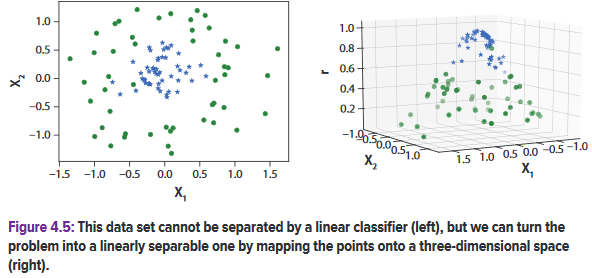

The three most common kernel functions (or families) used by SVMs are:
* the linear kernel
    simplest case, in which the possible separating surfaces are hyperplanes in the original feature space (i.e., the kernel is effectively the identity matrix)

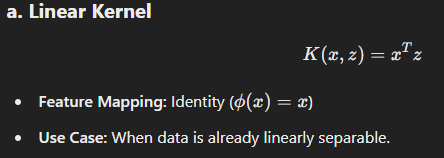

* the polynomial kernel

    $K(x, z) = (x^Tz + 1)^d$

    in this new space the features are mapped to combinations of monomials of degree up to d

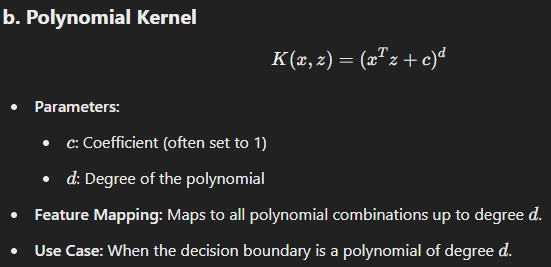

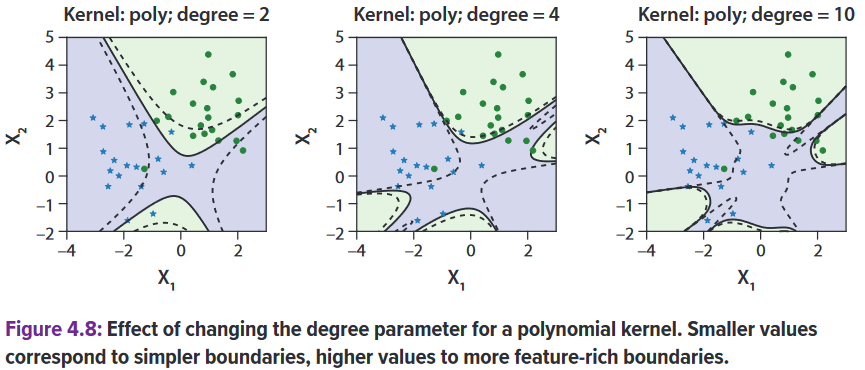

* the Gaussian kernel (dubbed "rbf" in sklearn, for "radial basis function").

    $K(x, z) = e^{-\gamma {|x-z|}^2}$

    this feature mapping is infinite dimensional (a gaussian function is an infinite converging Taylor series of polynomials, so one can view the Gaussian kernel as an infinite series of polynomial kernels)

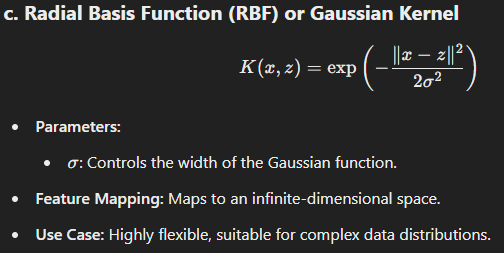

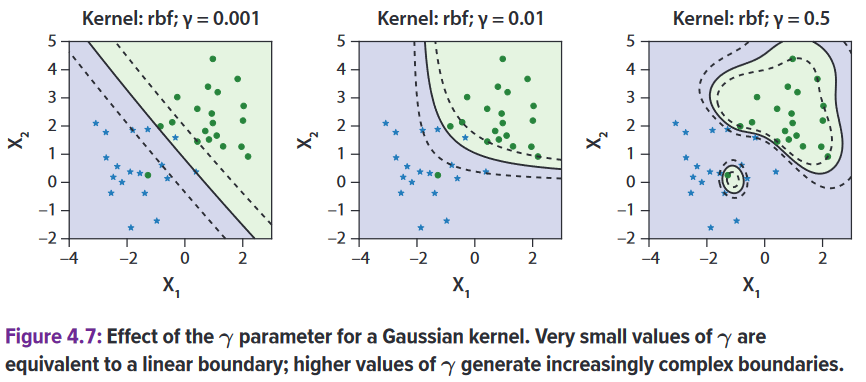

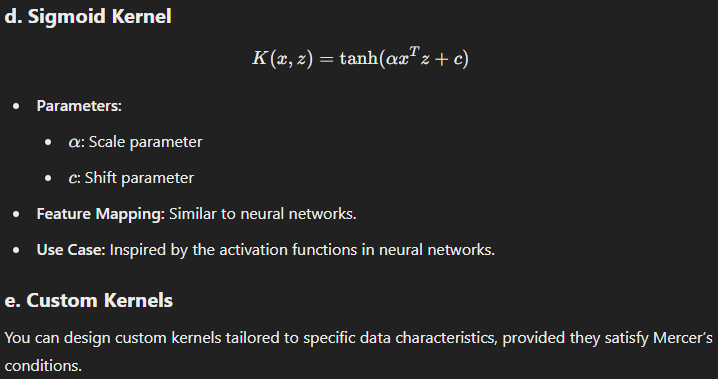

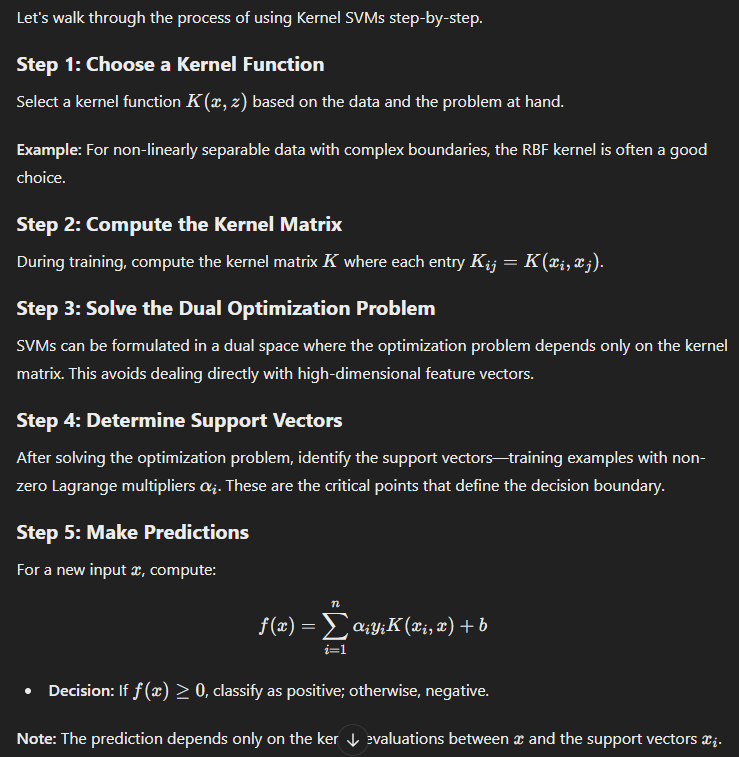

### in sklearn

* https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation

In [8]:
from sklearn import svm

* `SVC`, `NuSVC` and `LinearSVC` are classes capable of performing binary and multi-class classification on a dataset.

    SVC and NuSVC are similar methods, but accept slightly different sets of parameters and have different mathematical formulations. On the other hand, LinearSVC is another (faster) implementation of Support Vector Classification for the case of a linear kernel.

In [9]:
X = [[0, 0], [1, 1]]
y = [0, 1]

In [10]:
clf = svm.SVC()
clf.fit(X, y)

SVC()

In [11]:
clf.predict([[2., 2.]])

array([1])

* SVMs decision function depends on some subset of the training data, called the support vectors. Some properties of these support vectors can be found in attributes `support_vectors_`, `support_` and `n_support_`

In [12]:
# get support vectors
clf.support_vectors_

array([[0., 0.],
       [1., 1.]])

In [13]:
# get indices of support vectors
clf.support_

array([0, 1], dtype=int32)

In [14]:
# get number of support vectors for each class
clf.n_support_

array([1, 1], dtype=int32)

**Unbalanced problems**

For the case of heavily imbalanced data sets, it might be convenient to use a class-dependent regularization parameter, whose effect is to attribute a different penalty value to in-margin or misclassified examples for the two classes.

In problems where it is desired to give more importance to certain classes or certain individual samples, the parameters `class_weight` and `sample_weight` can be used.

    SVC (but not NuSVC) implements the parameter class_weight in the fit method. It’s a dictionary of the form {class_label : value}, where value is a floating point number > 0 that sets the parameter C of class class_label to C * value. The figure below illustrates the decision boundary of an unbalanced problem, with and without weight correction.

    SVC, NuSVC, SVR, NuSVR, LinearSVC, LinearSVR and OneClassSVM implement also weights for individual samples in the fit method through the sample_weight parameter. Similar to class_weight, this sets the parameter C for the i-th example to C * sample_weight[i], which will encourage the classifier to get these samples right.

### implementation

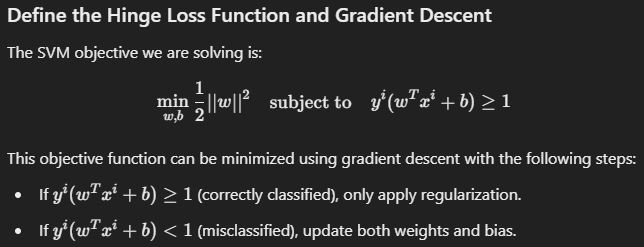

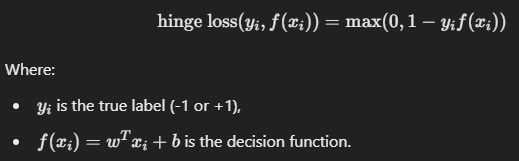

In [15]:
def hinge_loss_gradient(X, y, w, b, lambda_param):
    """
    Compute the gradient of the hinge loss.
    
    Parameters:
    - X: Input data matrix (n_samples, n_features)
    - y: Labels (-1 or 1)
    - w: Weight vector
    - b: Bias term
    - lambda_param: Regularization parameter
    
    Returns:
    - dw: Gradient of weights
    - db: Gradient of bias
    """
    n_samples, n_features = X.shape
    dw = np.zeros(n_features)
    db = 0

    for i in range(n_samples):
        condition = y[i] * (np.dot(X[i], w) + b) >= 1
        if condition:
            # No hinge loss, only regularization term
            dw += 2 * lambda_param * w
        else:
            # Misclassification, apply hinge loss gradient update
            dw += 2 * lambda_param * w - np.dot(X[i], y[i])
            db += -y[i]
    
    return dw, db

In [16]:
def gradient_descent(X, y, learning_rate, lambda_param, n_iters):
    """
    Perform gradient descent to optimize the SVM objective.
    
    Parameters:
    - X: Input data matrix (n_samples, n_features)
    - y: Labels (-1 or 1)
    - learning_rate: Step size for gradient descent
    - lambda_param: Regularization parameter
    - n_iters: Number of iterations
    
    Returns:
    - w: Optimized weight vector
    - b: Optimized bias term
    """
    n_samples, n_features = X.shape
    w = np.zeros(n_features)  # Initialize weights
    b = 0  # Initialize bias

    # Gradient descent loop
    for _ in range(n_iters):
        dw, db = hinge_loss_gradient(X, y, w, b, lambda_param)

        # Update weights and bias
        w = w - learning_rate * dw
        b = b - learning_rate * db

    return w, b

In [17]:
# Create a 2D dataset with 2 linearly separable classes
X, y = datasets.make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=1.05)

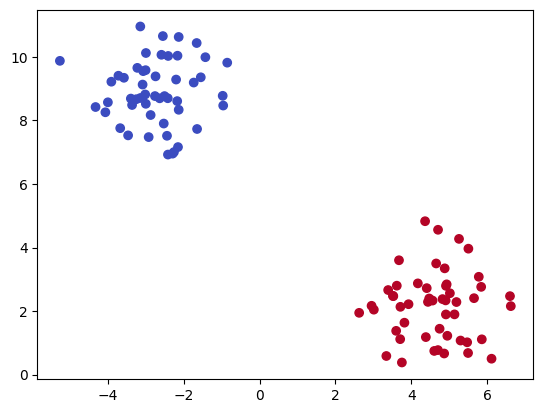

In [18]:
# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.show()

In [19]:
# Convert labels to -1 and 1
y = np.where(y == 0, -1, 1)

In [20]:
# Hyperparameters
learning_rate = 0.001
lambda_param = 0.01
n_iters = 1000

# Train the model using gradient descent
w, b = gradient_descent(X, y, learning_rate, lambda_param, n_iters)

In [21]:
def plot_decision_boundary(X, y, w, b):
    """
    Plot the decision boundary and margins of the SVM model.
    
    Parameters:
    - X: Input data matrix
    - y: Labels (-1 or 1)
    - w: Weight vector
    - b: Bias term
    """
    def get_hyperplane_value(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')

    # Plot decision boundary (w^T x + b = 0)
    x0_1 = np.amin(X[:, 0])
    x0_2 = np.amax(X[:, 0])

    x1_1 = get_hyperplane_value(x0_1, w, b, 0)
    x1_2 = get_hyperplane_value(x0_2, w, b, 0)

    plt.plot([x0_1, x0_2], [x1_1, x1_2], 'k')

    # Plot margins (w^T x + b = 1 and w^T x + b = -1)
    x1_1_margin = get_hyperplane_value(x0_1, w, b, 1)
    x1_2_margin = get_hyperplane_value(x0_2, w, b, 1)
    plt.plot([x0_1, x0_2], [x1_1_margin, x1_2_margin], 'k--')

    x1_1_margin = get_hyperplane_value(x0_1, w, b, -1)
    x1_2_margin = get_hyperplane_value(x0_2, w, b, -1)
    plt.plot([x0_1, x0_2], [x1_1_margin, x1_2_margin], 'k--')

    plt.show()

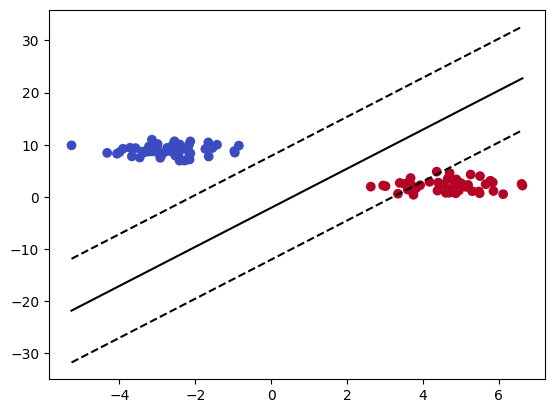

In [22]:
# Plot the decision boundary
plot_decision_boundary(X, y, w, b)

In [23]:
def predict(X, w, b):
    """
    Make predictions using the trained SVM model.
    
    Parameters:
    - X: Input data matrix (n_samples, n_features)
    - w: Weight vector
    - b: Bias term
    
    Returns:
    - predictions: Array of predictions (-1 or 1)
    """
    linear_output = np.dot(X, w) + b
    return np.sign(linear_output)

In [24]:
# Make predictions and calculate accuracy
y_pred = predict(X, w, b)
accuracy = np.mean(y_pred == y)
print(f"Model accuracy: {accuracy * 100:.2f}%")

Model accuracy: 100.00%


## multiclass classification

### in sklearn

SVC and NuSVC implement the “one-versus-one” approach for multi-class classification. In total, n_classes * (n_classes - 1) / 2 classifiers are constructed and each one trains data from two classes. To provide a consistent interface with other classifiers, the `decision_function_shape` option allows to monotonically transform the results of the “one-versus-one” classifiers to a “one-vs-rest” decision function of shape (n_samples, n_classes), which is the default setting of the parameter (default=’ovr’)

In [25]:
X = [[0], [1], [2], [3]]
Y = [0, 1, 2, 3]

In [26]:
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X, Y)

SVC(decision_function_shape='ovo')

In [27]:
dec = clf.decision_function([[1]])
dec

array([[-0.55067104,  0.        ,  0.40856676,  0.55067104,  0.9592378 ,
         0.40856676]])

In [28]:
dec.shape[1] # 6 classes: 4*3/2 = 6

6

In [29]:
clf.decision_function_shape = "ovr"
dec = clf.decision_function([[1]])
dec

array([[ 1.9585256 ,  3.22442151,  0.9585256 , -0.21327254]])

In [30]:
dec.shape[1] # 4 classes

4

On the other hand, LinearSVC implements “one-vs-the-rest” multi-class strategy, thus training n_classes models.

In [31]:
lin_clf = svm.LinearSVC()
lin_clf.fit(X, Y)

LinearSVC()

In [32]:
dec = lin_clf.decision_function([[1]])
dec

array([[-0.54545455, -0.37606838, -0.47863248, -0.58119658]])

In [33]:
dec.shape[1]

4

### implementation

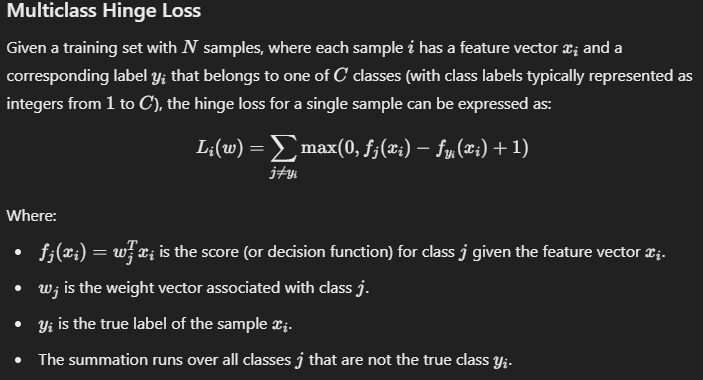

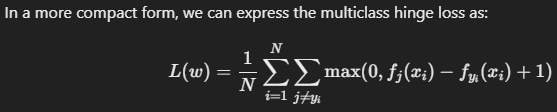

for comparison, first is shown the code for logistic regression (multiclass), then a simplified (not working!) binary SVC with the code separated into the usual functions, and then the (working) multiclass SVC. Thanks ChatGPT

In [34]:
# Sigmoid function for logistic regression (not used in SVC)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [35]:
# here for comparison
# this function corresponds to the forward pass in neural networks
def predict_proba(X, W):
    weighted_sum = np.matmul(X, W)
    return sigmoid(weighted_sum)

def predict_proba(X, w):
    """Compute the decision function f(x) = w^T x."""
    return np.dot(X, w)

def predict_proba(X, W):
    """Compute the decision function f(x) = W^T x for each class."""
    return np.matmul(X, W)

In [36]:
# here for comparison
def loss(X, y, w):
    y_hat = predict_proba(X, w)
    first_term = y * np.log(y_hat)
    second_term = (1 - y) * np.log(1 - y_hat)
    return -np.mean(first_term + second_term)

# loss function for Linear SVC - Hinge loss function
def hinge_loss(X, y, w):
    """Compute the hinge loss."""
    
    decision = predict_proba(X, w)
    return np.mean(np.maximum(0, 1 - y * decision))

# Loss function for Linear SVC - Hinge loss function (multiclass)
def hinge_loss(X, y, W):
    """Compute the hinge loss for multiclass classification."""
    
    decision = predict_proba(X, W)  # Shape: (n_samples, n_classes)
    
    # Calculate the margin for each class
    correct_class_decision = decision[np.arange(X.shape[0]), y].reshape(-1, 1)
    loss = np.maximum(0, 1 - (decision - correct_class_decision + 1))
    
    return np.mean(np.sum(loss, axis=1))  # Average over all samples

In [37]:
# here for comparison
def gradient(X, y, w):
    # Forward pass to compute the predictions (y_hat)
    y_hat = predict_proba(X, w)
    
    # Gradient of the binary cross-entropy loss
    return np.matmul(X.T, (y_hat - y)) / X.shape[0]

def gradient(X, y, w):
    """Compute the gradient of the hinge loss."""
    decision = predict_proba(X, w)
    indicator = y * decision < 1  # Check where the hinge loss is non-zero
    grad = np.zeros_like(w)
    grad[1:] = np.dot(X[indicator].T, -y[indicator]) / X.shape[0]  # Gradient for w1, w2, ...
    grad[0] = 0  # No gradient update for bias term (optional)
    return grad

def gradient(X, y, W):
    """Compute the gradient of the hinge loss for multiclass classification."""
    decision = predict_proba(X, W)
    grad = np.zeros_like(W)
    
    for i in range(X.shape[0]):
        # For the correct class
        if decision[i, y[i]] < 1:  # Check if hinge loss is non-zero
            grad[:, y[i]] -= X[i]  # Update for correct class
        # For all classes
        for j in range(decision.shape[1]):
            if j != y[i] and decision[i, j] > 0:  # Check if hinge loss is non-zero
                grad[:, j] += X[i]  # Update for incorrect classes
                
    return grad / X.shape[0]  # Average gradient over all samples

In [38]:
def train(X, y, iterations, lr, print_every=5000, tol=1e-6, patience=10):
    w = np.zeros(X.shape[1])  # Initialize weights as a 1D array
    best_loss = float('inf')  # Keep track of the best loss
    no_improvement_count = 0  # Count iterations without improvement

    for i in range(iterations):
        # Update weights
        w -= gradient(X, y, w) * lr
        
        # Calculate loss
        current_loss = hinge_loss(X, y, w)  # Use the SVC loss function

        # Print loss every 'print_every' iterations
        if (i + 1) % print_every == 0:
            print(f"Iteration {i + 1}: Loss = {current_loss}")
        
        # Check for improvement in the loss
        if current_loss < best_loss - tol:
            best_loss = current_loss
            no_improvement_count = 0
        else:
            no_improvement_count += 1
        
        # Early stopping condition
        if no_improvement_count >= patience:
            print(f"Early stopping at iteration {i + 1}: Best loss = {best_loss}")
            break
    
    return w

def train(X, y, iterations, lr, n_classes, print_every=5000, tol=1e-6, patience=10):
    W = np.zeros((X.shape[1], n_classes))  # Initialize weights for each class
    best_loss = float('inf')  # Keep track of the best loss
    no_improvement_count = 0  # Count iterations without improvement

    for i in range(iterations):
        # Update weights
        W -= gradient(X, y, W) * lr
        
        # Calculate loss
        current_loss = hinge_loss(X, y, W)  # Use the multiclass SVC loss function

        # Print loss every 'print_every' iterations
        if (i + 1) % print_every == 0:
            print(f"Iteration {i + 1}: Loss = {current_loss}")
        
        # Check for improvement in the loss
        if current_loss < best_loss - tol:
            best_loss = current_loss
            no_improvement_count = 0
        else:
            no_improvement_count += 1
        
        # Early stopping condition
        if no_improvement_count >= patience:
            print(f"Early stopping at iteration {i + 1}: Best loss = {best_loss}")
            break
    
    return W

In [39]:
# Generate synthetic data for multiclass classification
X, y = datasets.make_blobs(n_samples=100, centers=3, random_state=42, cluster_std=1.05)

In [40]:
# Add a column of 1's for the bias term
X = np.hstack((np.ones((X.shape[0], 1)), X))

In [41]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
# Set hyperparameters and train the model
iterations = 10000  # Maximum number of iterations
learning_rate = 0.01  # Learning rate for gradient descent
n_classes = len(np.unique(y))  # Number of classes
W = train(X_train, y_train, iterations, lr=learning_rate, n_classes=n_classes)

Early stopping at iteration 11: Best loss = 0.6027238172538492


In [43]:
# Make predictions and evaluate accuracy
def predict(X, W):
    return np.argmax(predict_proba(X, W), axis=1)  # Return class with highest score

y_pred_train = predict(X_train, W)
y_pred_test = predict(X_test, W)
train_accuracy = np.mean(y_pred_train == y_train) * 100
test_accuracy = np.mean(y_pred_test == y_test) * 100
print(f"Train Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")

Train Accuracy: 100.00%
Test Accuracy: 100.00%


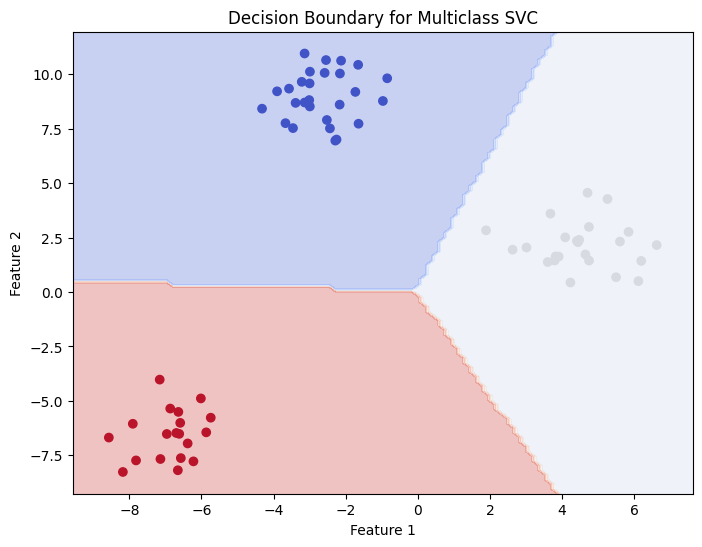

In [44]:
# Plot decision boundary for training data (only works for 2D data)
def plot_decision_boundary(X, y, W):
    plt.figure(figsize=(8, 6))
    
    # Scatter plot of data points
    plt.scatter(X[:, 1], X[:, 2], c=y, cmap='coolwarm')

    # Create grid to plot decision boundary
    x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = predict(np.c_[np.ones(xx.ravel().shape[0]), xx.ravel(), yy.ravel()], W)
    Z = Z.reshape(xx.shape)

    # Plot decision boundaries
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary for Multiclass SVC")
    plt.show()

plot_decision_boundary(X_train, y_train, W)